An introduction to machine learning with scikit-learn 
=====================================================


**Section contents**

In this section, we introduce the [machine
learning](https://en.wikipedia.org/wiki/Machine_learning) vocabulary
that we use throughout scikit-learn and give a simple learning example.
:::

Machine learning: the problem setting
-------------------------------------

In general, a learning problem considers a set of n
[samples](https://en.wikipedia.org/wiki/Sample_(statistics)) of data and
then tries to predict properties of unknown data. If each sample is more
than a single number and, for instance, a multi-dimensional entry (aka
[multivariate](https://en.wikipedia.org/wiki/Multivariate_random_variable)
data), it is said to have several attributes or **features**.

Learning problems fall into a few categories:

> -   [supervised
>     learning](https://en.wikipedia.org/wiki/Supervised_learning), in
>     which the data comes with additional attributes that we want to
>     predict ([Click here \<supervised-learning\>]{role="ref"} to go to
>     the scikit-learn supervised learning page).This problem can be
>     either:
>
>     > -   [classification](https://en.wikipedia.org/wiki/Classification_in_machine_learning):
>     >     samples belong to two or more classes and we want to learn
>     >     from already labeled data how to predict the class of
>     >     unlabeled data. An example of a classification problem would
>     >     be handwritten digit recognition, in which the aim is to
>     >     assign each input vector to one of a finite number of
>     >     discrete categories. Another way to think of classification
>     >     is as a discrete (as opposed to continuous) form of
>     >     supervised learning where one has a limited number of
>     >     categories and for each of the n samples provided, one is to
>     >     try to label them with the correct category or class.
>     > -   [regression](https://en.wikipedia.org/wiki/Regression_analysis):
>     >     if the desired output consists of one or more continuous
>     >     variables, then the task is called *regression*. An example
>     >     of a regression problem would be the prediction of the
>     >     length of a salmon as a function of its age and weight.
>
> -   [unsupervised
>     learning](https://en.wikipedia.org/wiki/Unsupervised_learning), in
>     which the training data consists of a set of input vectors x
>     without any corresponding target values. The goal in such problems
>     may be to discover groups of similar examples within the data,
>     where it is called
>     [clustering](https://en.wikipedia.org/wiki/Cluster_analysis), or
>     to determine the distribution of data within the input space,
>     known as [density
>     estimation](https://en.wikipedia.org/wiki/Density_estimation), or
>     to project the data from a high-dimensional space down to two or
>     three dimensions for the purpose of *visualization*
>     ([Click here \<unsupervised-learning\>]{role="ref"} to go to the
>     Scikit-Learn unsupervised learning page).


**Training set and testing set**

Machine learning is about learning some properties of a data set and
then testing those properties against another data set. A common
practice in machine learning is to evaluate an algorithm by splitting a
data set into two. We call one of those sets the **training set**, on
which we learn some properties; we call the other set the **testing
set**, on which we test the learned properties.
:::

Loading an example dataset 
--------------------------

scikit-learn comes with a few standard datasets, for instance the
[iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) and
[digits](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)
datasets for classification and the [boston house prices
dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)
for regression.

In the following, we use a start a code cell to load the `iris` and `digits` datasets. 


In [2]:

from sklearn import datasets
iris = datasets.load_iris()
digits = datasets.load_digits()

A dataset is a dictionary-like object that holds all the data and some
metadata about the data. This data is stored in the `.data` member,
which is a `n_samples, n_features` array. In the case of supervised
problem, one or more response variables are stored in the `.target`
member. More details on the different datasets can be found in the
[dedicated
section \<datasets\>]{role="ref"}.

For instance, in the case of the digits dataset, `digits.data` gives
access to the features that can be used to classify the digits samples:

In [4]:
print(digits.data) 


[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


and `digits.target` gives the ground truth for the digit dataset, that
is the number corresponding to each digit image that we are trying to
learn:

In [5]:
digits.target


array([0, 1, 2, ..., 8, 9, 8])


**Shape of the data arrays**

The data is always a 2D array, shape `(n_samples, n_features)`, although
the original data may have had a different shape. In the case of the
digits, each original sample is an image of shape `(8, 8)` and can be
accessed using:

In [8]:
digits.images[0]


array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

The [simple example on this dataset
\<sphx\_glr\_auto\_examples\_classification\_plot\_digits\_classification.py\>]{role="ref"}
illustrates how starting from the original problem one can shape the
data for consumption in scikit-learn.
:::

::: {.topic}
**Loading from external datasets**

To load from an external dataset, please refer to
[loading external datasets \<external\_datasets\>]{role="ref"}.
:::

Learning and predicting
-----------------------

In the case of the digits dataset, the task is to predict, given an
image, which digit it represents. We are given samples of each of the 10
possible classes (the digits zero through nine) on which we *fit* an
[estimator](https://en.wikipedia.org/wiki/Estimator) to be able to
*predict* the classes to which unseen samples belong.

In scikit-learn, an estimator for classification is a Python object that
implements the methods `fit(X, y)` and `predict(T)`.

An example of an estimator is the class `sklearn.svm.SVC`, which
implements [support vector
classification](https://en.wikipedia.org/wiki/Support_vector_machine).
The estimator\'s constructor takes as arguments the model\'s parameters.

For now, we will consider the estimator as a black box:

In [9]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

::: {.topic}
**Choosing the parameters of the model**

In this example, we set the value of `gamma` manually. To find good
values for these parameters, we can use tools such as
[grid search \<grid\_search\>]{role="ref"} and [cross validation
\<cross\_validation\>]{role="ref"}.
:::

The `clf` (for classifier) estimator instance is first fitted to the
model; that is, it must *learn* from the model. This is done by passing
our training set to the `fit` method. For the training set, we\'ll use
all the images from our dataset, except for the last image, which we\'ll
reserve for our predicting. We select the training set with the `[:-1]`
Python syntax, which produces a new array that contains all but the last
item from `digits.data`:

In [12]:
clf.fit(digits.data[:-1], digits.target[:-1])


SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Now you can *predict* new values. In this case, you\'ll predict using
the last image from `digits.data`. By predicting, you\'ll determine the
image from the training set that best matches the last image.

In [14]:
clf.predict(digits.data)


array([0, 1, 2, ..., 8, 9, 8])



The corresponding image is:

[![digit](http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_last_image_001.png "Digit")](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html)

As you can see, it is a challenging task: after all, the images are of
poor resolution. Do you agree with the classifier?

A complete example of this classification problem is available as an
example below or [here](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py)




Automatically created module for IPython interactive environment
Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1

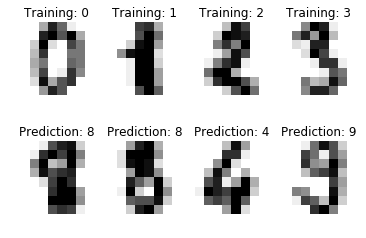

In [15]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

Model persistence
-----------------

It is possible to save a model in scikit-learn by using Python\'s
built-in persistence model,
[pickle](https://docs.python.org/2/library/pickle.html):

In [16]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)  





import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

y[0]

0

In the specific case of scikit-learn, it may be more interesting to use
joblib\'s replacement for pickle (`joblib.dump` & `joblib.load`), which
is more efficient on big data but it can only pickle to the disk and not
to a string:

In [17]:
from sklearn.externals import joblib
joblib.dump(clf, 'filename.pkl') 


['filename.pkl']

Later, you can reload the pickled model (possibly in another Python
process) with:

In [18]:
clf = joblib.load('filename.pkl') 

::: {.note}
::: {.admonition-title}
Note
:::

`joblib.dump` and `joblib.load` functions also accept file-like object
instead of filenames. More information on data persistence with Joblib
is available [here](https://pythonhosted.org/joblib/persistence.html).
:::

Note that pickle has some security and maintainability issues. Please
refer to section [model\_persistence]{role="ref"} for more detailed
information about model persistence with scikit-learn.



### Refitting and updating parameters

Hyper-parameters of an estimator can be updated after it has been
constructed via the [sklearn.pipeline.Pipeline.set\_params]{role="func"}
method. Calling `fit()` more than once will overwrite what was learned
by any previous `fit()`:

In [20]:
import numpy as np
from sklearn.svm import SVC

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

clf = SVC()
clf.set_params(kernel='linear').fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
clf.predict(X_test)

array([1, 0, 1, 1, 0])

In [22]:
clf.set_params(kernel='rbf').fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
clf.predict(X_test)

array([0, 0, 0, 1, 0])

Here, the default kernel `rbf` is first changed to `linear` after the
estimator has been constructed via `SVC()`, and changed back to `rbf` to
refit the estimator and to make a second prediction.

### Multiclass vs. multilabel fitting

When using
[multiclass classifiers \<sklearn.multiclass\>]{role="class"}, the
learning and prediction task that is performed is dependent on the
format of the target data fit upon:

In [ ]:
>>> from sklearn.svm import SVC
>>> from sklearn.multiclass import OneVsRestClassifier
>>> from sklearn.preprocessing import LabelBinarizer

>>> X = [[1, 2], [2, 4], [4, 5], [3, 2], [3, 1]]
>>> y = [0, 0, 1, 1, 2]

>>> classif = OneVsRestClassifier(estimator=SVC(gamma='scale',
...                                             random_state=0))
>>> classif.fit(X, y).predict(X)
array([0, 0, 1, 1, 2])

In the above case, the classifier is fit on a 1d array of multiclass
labels and the `predict()` method therefore provides corresponding
multiclass predictions. It is also possible to fit upon a 2d array of
binary label indicators:

In [ ]:
>>> y = LabelBinarizer().fit_transform(y)
>>> classif.fit(X, y).predict(X)
array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 0, 0]])

Here, the classifier is `fit()` on a 2d binary label representation of
`y`, using the
[LabelBinarizer \<sklearn.preprocessing.LabelBinarizer\>]{role="class"}.
In this case `predict()` returns a 2d array representing the
corresponding multilabel predictions.

Note that the fourth and fifth instances returned all zeroes, indicating
that they matched none of the three labels `fit` upon. With multilabel
outputs, it is similarly possible for an instance to be assigned
multiple labels:

In [ ]:
>> from sklearn.preprocessing import MultiLabelBinarizer
>> y = [[0, 1], [0, 2], [1, 3], [0, 2, 3], [2, 4]]
>> y = MultiLabelBinarizer().fit_transform(y)
>> classif.fit(X, y).predict(X)
array([[1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 1, 0, 1]])

In this case, the classifier is fit upon instances each assigned
multiple labels. The
[MultiLabelBinarizer \<sklearn.preprocessing.MultiLabelBinarizer\>]{role="class"}
is used to binarize the 2d array of multilabels to `fit` upon. As a
result, `predict()` returns a 2d array with multiple predicted labels
for each instance.